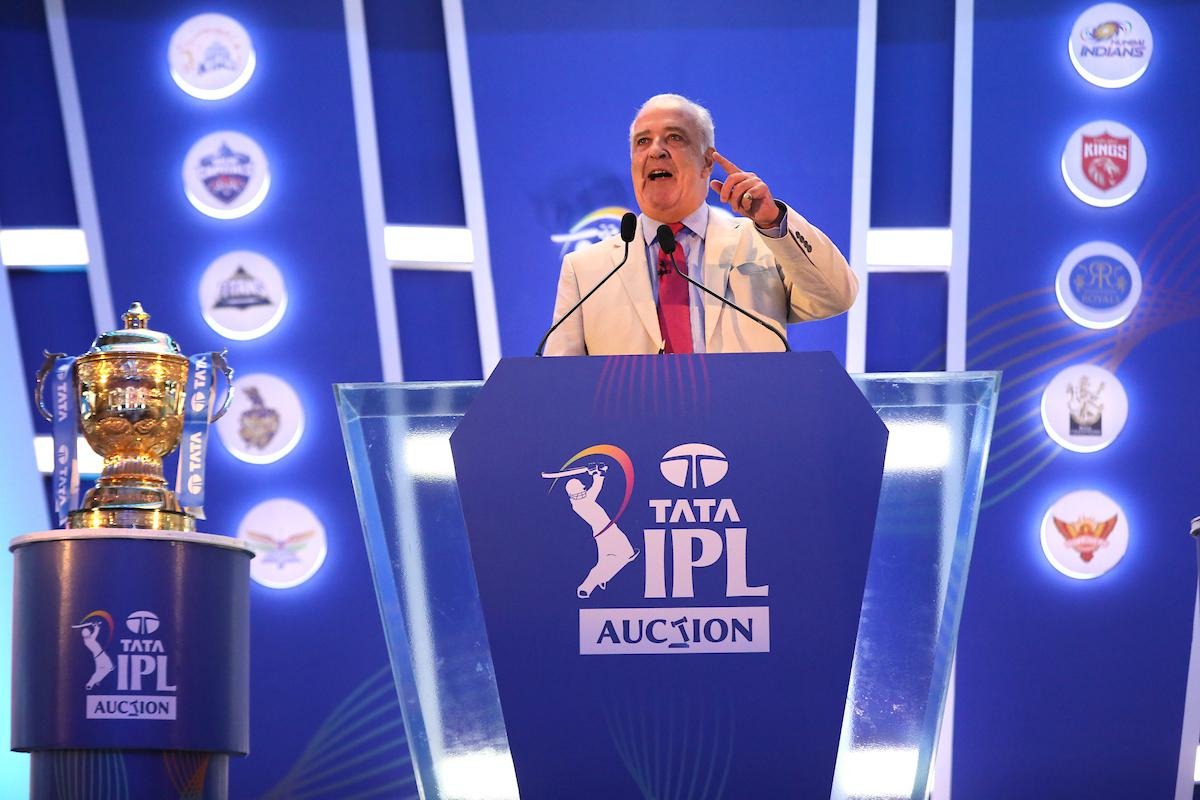

#### loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl_data = pd.read_csv('./ipl_2022_dataset.csv')

#### Understanding the data

In [3]:
ipl_data.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
ipl_data.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [5]:
ipl_data['Base Price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [6]:
ipl_data['TYPE'].unique()

array(['BOWLER', 'ALL-ROUNDER', 'BATTER', 'WICKETKEEPER'], dtype=object)

In [7]:
ipl_data['Team'].unique()

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Unsold'], dtype=object)

In [8]:
ipl_data.shape

(633, 8)

In [9]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [10]:
ipl_data.describe()

,Unnamed: 0,COST IN ₹ (CR.),Cost IN $ (000)
count,633.000000,237.000000,237.000000
mean,316.000000,3.695781,480.451477
std,182.875641,4.238092,550.951945
min,0.000000,0.200000,26.000000
25%,158.000000,0.400000,52.000000
50%,316.000000,1.900000,247.000000
75%,474.000000,6.500000,845.000000
max,632.000000,17.000000,2210.000000


#### Data Pre-preparing

In [11]:
ipl_data.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
ipl_data.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [13]:
ipl_data.isnull().mean()*100

Player              0.000000
Base Price          0.000000
TYPE                0.000000
COST IN ₹ (CR.)    62.559242
Cost IN $ (000)    62.559242
2021 Squad         68.562401
Team                0.000000
dtype: float64

#### Treatment for the null values

In [14]:
ipl_data['COST IN ₹ (CR.)'] = ipl_data['COST IN ₹ (CR.)'].fillna(0)

In [15]:
ipl_data['Cost IN $ (000)']=  ipl_data['Cost IN $ (000)'].fillna(0)

In [16]:
ipl_data['2021 Squad'] = ipl_data['2021 Squad'].fillna('Not Auctioned')

In [17]:
ipl_data.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [18]:
Total_team =  ipl_data[ipl_data['COST IN ₹ (CR.)']>0]['Team'].unique()
Total_team

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

### Adding a new cloumn Status

In [19]:
ipl_data['Status']= ipl_data['Team'].replace(Total_team,'Sold')

#### Duplicate

In [20]:
ipl_data.duplicated().sum()

1

In [21]:
ipl_data[ipl_data['Player'].duplicated()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
499,Amit Mishra,20 Lakh,BOWLER,0.0,0.0,Not Auctioned,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.0,0.0,Not Auctioned,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.0,0.0,Not Auctioned,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.0,0.0,Not Auctioned,Unsold,Unsold


In [22]:
ipl_data[ipl_data['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not Auctioned,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Auctioned,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not Auctioned,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Auctioned,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not Auctioned,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not Auctioned,Unsold,Unsold


In [23]:
ipl_data.drop_duplicates(inplace=True)

In [24]:
ipl_data.duplicated().sum()

0

In [25]:
Unsold_players_in_Auction = ipl_data.query("Status=='Unsold'")


## Descriptive Analytics

In [26]:
# how many players participated in  2022 Tata IPL Auction ?

ipl_data.shape[0]

632

In [27]:
# how many types of players participated in 2022 Tata IPL ?

Types = ipl_data.TYPE.value_counts()
Types.reset_index()

,index,TYPE
0,ALL-ROUNDER,241
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

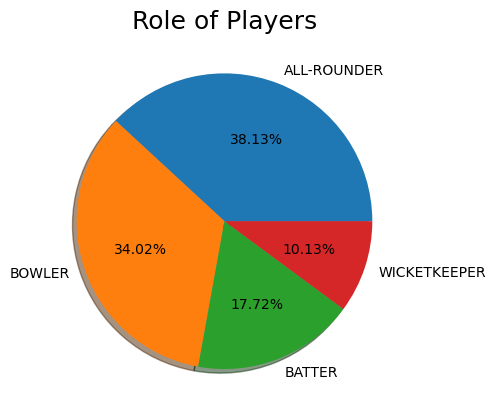

In [28]:
plt.pie(Types.values, labels=Types.index,autopct='%1.2f%%',shadow=True);
plt.title('Role of Players', fontsize=18 )
plt.plot()

In [29]:
# how many players are sold and unsold in 2022 Tata IPL ?

Sold_unsold_list = ipl_data.Status.value_counts()
Sold_unsold_list.reset_index()

,index,Status
0,Unsold,395
1,Sold,237


[]

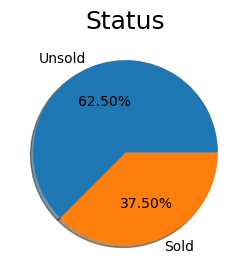

In [30]:
plt.figure(figsize=(5,3))
plt.pie(Sold_unsold_list.values, labels=Sold_unsold_list.index,autopct='%1.2f%%',shadow=True);
plt.title('Status', fontsize=18 )
plt.plot()

In [31]:
# how many player sold and respective types in IPL 2022?

Player_2022 = ipl_data.query("Status=='Sold'")
Player_2022.Team.value_counts().reset_index()

,index,Team
0,Chennai Super Kings,25
1,Kolkata Knight Riders,25
2,Punjab Kings,25
3,Mumbai Indians,25
4,Delhi Capitals,24
5,Rajasthan Royals,24
6,Sunrisers Hyderabad,23
7,Gujarat Titans,22
8,Lucknow Super Giants,22
9,Royal Challengers Bangalore,22


In [32]:
Player_2022 = ipl_data.query("Status=='Sold'")
type_sold = Player_2022.TYPE.value_counts()
type_sold.reset_index()

,index,TYPE
0,ALL-ROUNDER,88
1,BOWLER,77
2,BATTER,45
3,WICKETKEEPER,27


[]

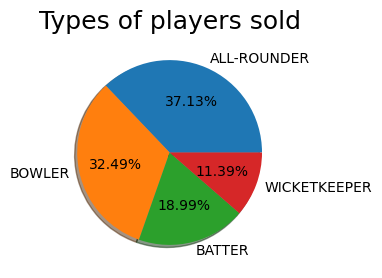

In [33]:
plt.figure(figsize=(5,3))
plt.pie(type_sold.values, labels=type_sold.index,autopct='%1.2f%%',shadow=True);
plt.title('Types of players sold', fontsize=18 )
plt.plot()

### Adding Country details to respective data

In [34]:
Nationality = pd.read_excel('./Book1 ipl.xlsx')
Nationality

,Player,Nationality
0,Robin Uthappa,Indian
1,Dwayne Bravo,West Indies
2,Ambati Rayudu,Indian
3,Deepak Chahar,Indian
4,C.Hari Nishaanth,Indian
...,...,...
232,Rashid Khan,Afghanistan
233,Shubman Gill,Indian
234,KL Rahul,Indian
235,Marcus Stoinis,Australia


In [35]:
ipl_data = pd.merge(Player_2022,Nationality,how='left',on='Player')
ipl_data.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Afghanistan
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Indian
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,New Zealand
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,Indian
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Indian


### Adding new column to find the person is indian or not 


In [36]:
ipl_data['Indian/Overseas'] = ipl_data['Nationality'].map(lambda x: 'Indian' if x == 'Indian' else 'Overseas')
ipl_data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Afghanistan,Overseas
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Indian,Indian
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,New Zealand,Overseas
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,Indian,Indian
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Indian,Indian
...,...,...,...,...,...,...,...,...,...,...
232,Priyam Garg,20 Lakh,BATTER,0.2,26.0,SRH,Sunrisers Hyderabad,Sold,Indian,Indian
233,R Samarth,20 Lakh,BATTER,0.2,26.0,Not Auctioned,Sunrisers Hyderabad,Sold,Indian,Indian
234,Jagadeesha Suchith,20 Lakh,BOWLER,0.2,26.0,SRH,Sunrisers Hyderabad,Sold,Indian,Indian
235,Shashank Singh,20 Lakh,ALL-ROUNDER,0.2,26.0,Not Auctioned,Sunrisers Hyderabad,Sold,Indian,Indian


### Trying to understand indian and overseas players distribution

In [37]:
Indian_players = ipl_data[ipl_data['Indian/Overseas'] == 'Indian']
Indian_players.head(3)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Indian,Indian
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,Indian,Indian
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Indian,Indian


In [38]:
Indian_players.shape[0]

158

In [39]:
Overseas_players = ipl_data[ipl_data['Indian/Overseas'] != 'Indian']
Overseas_players.head(3)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Afghanistan,Overseas
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,New Zealand,Overseas
7,David Miller,1 Cr,BATTER,3.0,390.0,RR,Gujarat Titans,Sold,South Africa,Overseas


In [40]:
Overseas_players.shape[0]

79

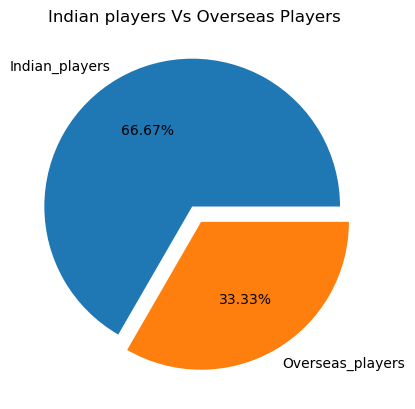

In [41]:
plt.pie([Indian_players.shape[0], Overseas_players.shape[0]],labels= ['Indian_players','Overseas_players'],\
        autopct='%1.2f%%',explode=[0.06,0.06])
plt.title('Indian players Vs Overseas Players ')
plt.show()

### Adding new Column

In [42]:
ipl_data['Retention'] = ipl_data['Base Price']
ipl_data['Base Price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [43]:
ipl_data['Retention'].replace(['2 Cr','40 Lakh','20 Lakh','50 Lakh','1 Cr','75 Lakh','1.5 Cr','30 Lakh'],'From Auction',inplace=True)

In [44]:
ipl_data.head(4)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas,Retention
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Afghanistan,Overseas,Draft Pick
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Indian,Indian,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,New Zealand,Overseas,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,Indian,Indian,From Auction


In [45]:
ipl_data['Base Price'].replace('Draft Pick',0, inplace=True)

In [46]:
ipl_data['Base Price'].replace('Retained',0, inplace=True)

In [47]:
ipl_data.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas,Retention
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Afghanistan,Overseas,Draft Pick
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Indian,Indian,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,New Zealand,Overseas,From Auction
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,Indian,Indian,From Auction
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Indian,Indian,Draft Pick


In [48]:
# total number of players brought from the auction and retained by respective teams

Brought_Rentained_Draft = ipl_data.groupby(['Team','Retention'])['Retention'].count()
Brought_Rentained_Draft = Brought_Rentained_Draft.reset_index(name='count')
Brought_Rentained_Draft

,Team,Retention,count
0,Chennai Super Kings,From Auction,21
1,Chennai Super Kings,Retained,4
2,Delhi Capitals,From Auction,20
3,Delhi Capitals,Retained,4
4,Gujarat Titans,Draft Pick,3
5,Gujarat Titans,From Auction,19
6,Kolkata Knight Riders,From Auction,21
7,Kolkata Knight Riders,Retained,4
8,Lucknow Super Giants,Draft Pick,3
9,Lucknow Super Giants,From Auction,19


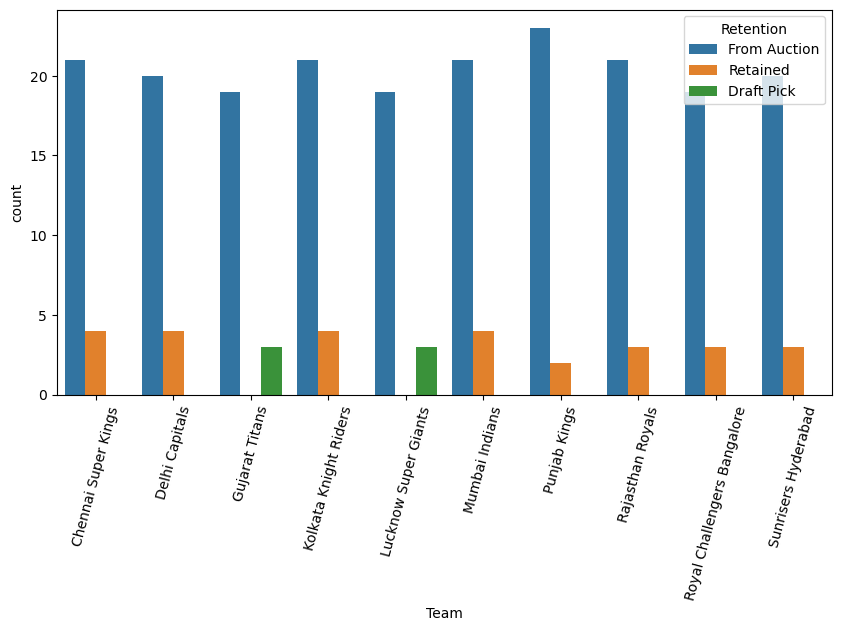

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data=Brought_Rentained_Draft[Brought_Rentained_Draft['Team'] != 'Unsold'], x= 'Team', y='count',hue='Retention')
plt.xticks(rotation = 75)
plt.show()

In [50]:
# who is the most valued player in the Auction

Auctioned_players = ipl_data.query("Retention=='From Auction'")
Auctioned_players['COST IN ₹ (CR.)'].max()
Auctioned_players[Auctioned_players['COST IN ₹ (CR.)']==15.25]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas,Retention
144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,1982.5,MI,Mumbai Indians,Sold,Indian,Indian,From Auction


In [51]:
# who is the most valued Batsman in the Auction

Batter = Auctioned_players.query("TYPE=='BATTER'")
Batter['COST IN ₹ (CR.)'].max()
Batter[Auctioned_players['COST IN ₹ (CR.)']==12.25]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas,Retention
71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders,Sold,Indian,Indian,From Auction


In [52]:
# who is the most valued bowler in the Auction

Bowler = Auctioned_players.query("TYPE=='BOWLER'")
Bowler['COST IN ₹ (CR.)'].max()
Bowler[Auctioned_players['COST IN ₹ (CR.)']==14.0]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas,Retention
23,Deepak Chahar,2 Cr,BOWLER,14.0,1820.0,CSK,Chennai Super Kings,Sold,Indian,Indian,From Auction


In [53]:
# who is the most valued Alrounder in the Auction


Allrounder = Auctioned_players.query("TYPE=='ALL-ROUNDER'")
Allrounder['COST IN ₹ (CR.)'].max()
Allrounder[Auctioned_players['COST IN ₹ (CR.)']==11.5]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas,Retention
97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.5,1495.0,RR,Punjab Kings,Sold,England,Overseas,From Auction


In [54]:
# who is the most valued batsman as retained

Retained_players145 = ipl_data.query("Retention=='Retained'")
Retained_bat = Retained_players145.query("TYPE=='BATTER'")
Retained_bat['COST IN ₹ (CR.)'].max()
Retained_bat[Retained_bat['COST IN ₹ (CR.)']==16.0]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/Overseas,Retention
143,Rohit Sharma,0,BATTER,16.0,2080.0,MI,Mumbai Indians,Sold,Indian,Indian,Retained


In [55]:
ipl_data.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team', 'Status', 'Nationality', 'Indian/Overseas',
       'Retention'],
      dtype='object')

### Trying to understand indian and overseas players Fare distribution

In [56]:
Team_wise_fare = ipl_data.groupby(['Team','Indian/Overseas'])['COST IN ₹ (CR.)'].mean().reset_index()
Team_wise_fare


,Team,Indian/Overseas,COST IN ₹ (CR.)
0,Chennai Super Kings,Indian,3.826471
1,Chennai Super Kings,Overseas,2.750000
2,Delhi Capitals,Indian,3.608824
3,Delhi Capitals,Overseas,3.578571
4,Gujarat Titans,Indian,3.817857
5,Gujarat Titans,Overseas,4.525000
6,Kolkata Knight Riders,Indian,2.612500
7,Kolkata Knight Riders,Overseas,4.416667
8,Lucknow Super Giants,Indian,3.513333
9,Lucknow Super Giants,Overseas,5.242857


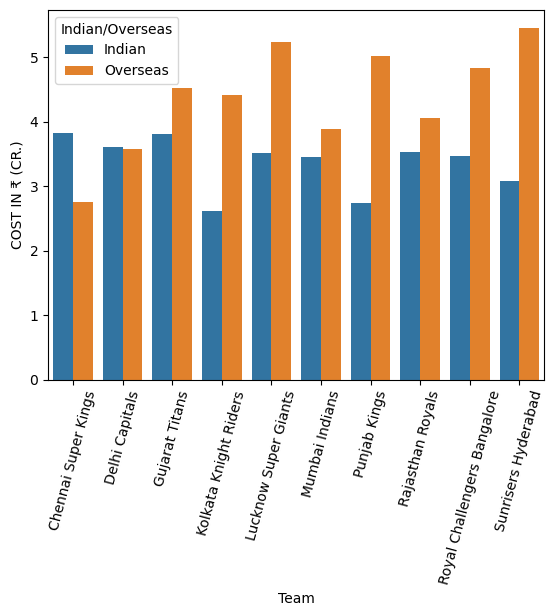

In [57]:
sns.barplot(data=Team_wise_fare, x='Team', y='COST IN ₹ (CR.)',hue='Indian/Overseas')
plt.xticks(rotation=75)
plt.show()

### Top 11 average spendings  of teams for players

In [58]:
Team_wise_fare = ipl_data.groupby(['Player','Team','Indian/Overseas'])['COST IN ₹ (CR.)'].mean().reset_index()
Team_wise_fare.nlargest(11,'COST IN ₹ (CR.)')

,Player,Team,Indian/Overseas,COST IN ₹ (CR.)
91,KL Rahul,Lucknow Super Giants,Indian,17.00
170,Ravindra Jadeja,Chennai Super Kings,Indian,16.00
174,Rishabh Pant,Delhi Capitals,Indian,16.00
178,Rohit Sharma,Mumbai Indians,Indian,16.00
71,Ishan Kishan,Mumbai Indians,Indian,15.25
67,Hardik Pandya,Gujarat Titans,Indian,15.00
166,Rashid Khan,Gujarat Titans,Overseas,15.00
227,Virat Kohli,Royal Challengers Bangalore,Indian,15.00
48,Deepak Chahar,Chennai Super Kings,Indian,14.00
94,Kane Williamson,Sunrisers Hyderabad,Overseas,14.00


### Player wise fare 

In [59]:
player_wise_fare = ipl_data[['Player','Team','Indian/Overseas','COST IN ₹ (CR.)']]
player_wise_fare

,Player,Team,Indian/Overseas,COST IN ₹ (CR.)
0,Rashid Khan,Gujarat Titans,Overseas,15.0
1,Hardik Pandya,Gujarat Titans,Indian,15.0
2,Lockie Ferguson,Gujarat Titans,Overseas,10.0
3,Rahul Tewatia,Gujarat Titans,Indian,9.0
4,Shubman Gill,Gujarat Titans,Indian,8.0
...,...,...,...,...
232,Priyam Garg,Sunrisers Hyderabad,Indian,0.2
233,R Samarth,Sunrisers Hyderabad,Indian,0.2
234,Jagadeesha Suchith,Sunrisers Hyderabad,Indian,0.2
235,Shashank Singh,Sunrisers Hyderabad,Indian,0.2


### CSK-> Players Diversification

In [60]:
Csk_list = player_wise_fare.query("Team=='Chennai Super Kings'").nlargest(25,'COST IN ₹ (CR.)').drop(columns=['Team'])
Csk_list

,Player,Indian/Overseas,COST IN ₹ (CR.)
22,Ravindra Jadeja,Indian,16.00
23,Deepak Chahar,Indian,14.00
24,MS Dhoni,Indian,12.00
25,Moeen Ali,Overseas,8.00
26,Ambati Rayudu,Indian,6.75
27,Ruturaj Gaikwad,Indian,6.00
28,Dwayne Bravo,Overseas,4.40
29,Shivam Dube,Indian,4.00
30,Chris Jordan,Overseas,3.60
31,Robin Uthappa,Indian,2.00


### SRH -> Players diversification

In [61]:
SRH_list = player_wise_fare.query("Team=='Sunrisers Hyderabad'").\
sort_values(by='COST IN ₹ (CR.)',ascending=False).drop(columns=['Team']).reset_index(drop=True)
SRH_list

,Player,Indian/Overseas,COST IN ₹ (CR.)
0,Kane Williamson,Overseas,14.00
1,Nicholas Pooran,Overseas,10.75
2,Washington Sundar,Indian,8.75
3,Rahul Tripathi,Indian,8.50
4,Romario Shepherd,Overseas,7.75
5,Abhishek Sharma,Indian,6.50
6,Marco Jansen,Overseas,4.20
7,Bhuvneshwar Kumar,Indian,4.20
8,Umran Malik,Indian,4.00
9,Kartik Tyagi,Indian,4.00


### Count of players ->CSK

In [62]:
Chennai = ipl_data.query("Team=='Chennai Super Kings'")

Chennai_groupby = Chennai.groupby(['TYPE','Indian/Overseas'])['TYPE'].count().reset_index(name='player_count')
Chennai_groupby

,TYPE,Indian/Overseas,player_count
0,ALL-ROUNDER,Indian,4
1,ALL-ROUNDER,Overseas,5
2,BATTER,Indian,4
3,BATTER,Overseas,1
4,BOWLER,Indian,6
5,BOWLER,Overseas,2
6,WICKETKEEPER,Indian,3


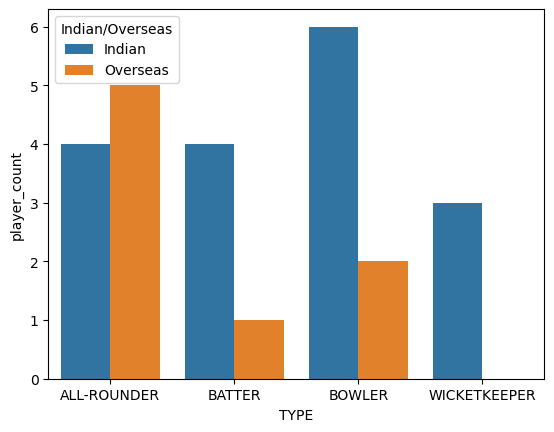

In [63]:
sns.barplot(Chennai_groupby,x='TYPE',y='player_count',hue='Indian/Overseas');

### Count of players ->SRH

In [64]:
SRH = ipl_data.query("Team=='Sunrisers Hyderabad'")
SRH_groupby = SRH.groupby(['TYPE','Indian/Overseas'])['TYPE'].count().reset_index(name='player_count')
SRH_groupby

,TYPE,Indian/Overseas,player_count
0,ALL-ROUNDER,Indian,4
1,ALL-ROUNDER,Overseas,2
2,BATTER,Indian,3
3,BATTER,Overseas,2
4,BOWLER,Indian,7
5,BOWLER,Overseas,2
6,WICKETKEEPER,Indian,1
7,WICKETKEEPER,Overseas,2


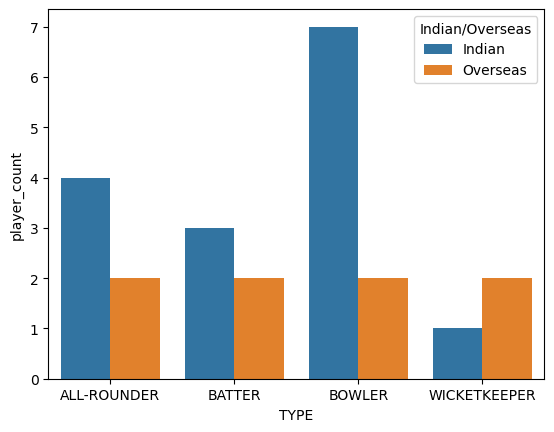

In [65]:
sns.barplot(SRH_groupby,x='TYPE',y='player_count',hue='Indian/Overseas');

### Crosstab to Understand Total Type wise player Distribution 

In [66]:
pd.crosstab(ipl_data.Retention,ipl_data.TYPE)

TYPE,ALL-ROUNDER,BATTER,BOWLER,WICKETKEEPER
Retention,,,,
Draft Pick,2,1,2,1
From Auction,77,36,69,22
Retained,9,8,6,4


### Crosstab to Understand Total Type player wise Team Distribution 

In [67]:
pd.crosstab(ipl_data.Team,ipl_data.TYPE)

TYPE,ALL-ROUNDER,BATTER,BOWLER,WICKETKEEPER
Team,,,,
Chennai Super Kings,9,5,8,3
Delhi Capitals,9,5,7,3
Gujarat Titans,8,4,8,2
Kolkata Knight Riders,10,7,5,3
Lucknow Super Giants,9,3,8,2
Mumbai Indians,11,5,7,2
Punjab Kings,11,3,8,3
Rajasthan Royals,6,5,10,3
Royal Challengers Bangalore,9,3,7,3


### Crosstab to Understand Total Type player Retained wise Team Distribution

In [68]:
Retained_players1 = ipl_data[ipl_data['Retention'] == 'Retained']
pd.crosstab(Retained_players1.Team,Retained_players1.TYPE)

TYPE,ALL-ROUNDER,BATTER,BOWLER,WICKETKEEPER
Team,,,,
Chennai Super Kings,2,1,0,1
Delhi Capitals,1,1,1,1
Kolkata Knight Riders,3,0,1,0
Mumbai Indians,1,2,1,0
Punjab Kings,0,1,1,0
Rajasthan Royals,0,1,0,2
Royal Challengers Bangalore,1,1,1,0
Sunrisers Hyderabad,1,1,1,0


### Crosstab to Understand Total Type player from auction wise Team Distribution

In [69]:
Auction_players1 = ipl_data[ipl_data['Retention'] == 'From Auction']
pd.crosstab(Auction_players1.Team,Auction_players1.TYPE)

TYPE,ALL-ROUNDER,BATTER,BOWLER,WICKETKEEPER
Team,,,,
Chennai Super Kings,7,4,8,2
Delhi Capitals,8,4,6,2
Gujarat Titans,7,3,7,2
Kolkata Knight Riders,7,7,4,3
Lucknow Super Giants,8,3,7,1
Mumbai Indians,10,3,6,2
Punjab Kings,11,2,7,3
Rajasthan Royals,6,4,10,1
Royal Challengers Bangalore,8,2,6,3


### Total Ipl sold Players Type Classification

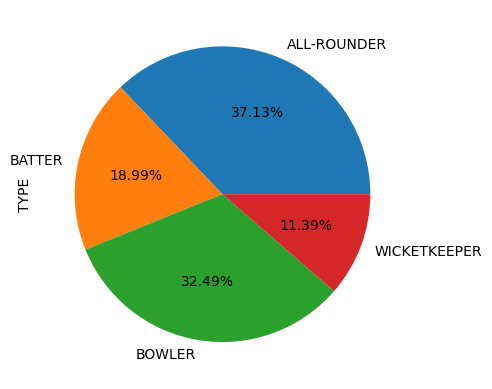

In [70]:
ipl_data.groupby(['TYPE'])['TYPE'].count().plot(kind='pie',autopct='%1.2f%%')
plt.show()

### Unsold Players Type Classification

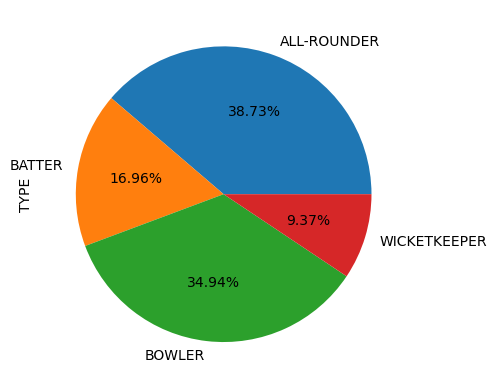

In [71]:
Unsold_players_in_Auction.groupby(['TYPE'])['TYPE'].count().plot(kind='pie',autopct='%1.2f%%')
plt.show()

### Sold Players Type distribution

In [72]:
sold_player_country = ipl_data.groupby(['TYPE','Indian/Overseas'])['TYPE'].count().reset_index(name='Player_count')


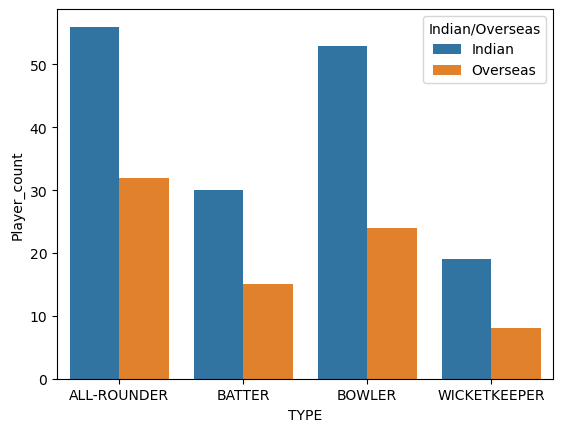

In [73]:
sns.barplot(data=sold_player_country, x='TYPE', y='Player_count', hue='Indian/Overseas')
plt.show()

In [74]:
Unsold_players_in_Auction.head(2)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
237,Suresh Raina,2 Cr,BATTER,0.0,0.0,CSK,Unsold,Unsold
238,Steve Smith,2 Cr,BATTER,0.0,0.0,DC,Unsold,Unsold


In [75]:
Unsold_players_in_Auction.reset_index(inplace=True)

In [76]:
Unsold_players_in_Auction.drop(columns='index',inplace=True)

In [77]:
Unsold_players_in_Auction.iloc[:,0].values

array(['Suresh Raina', 'Steve Smith', 'Shakib Al Hasan', 'Amit Mishra',
       'Adil Rashid', 'Imran Tahir', 'Mujeeb Zadran', 'Adam Zampa',
       'Rajat Patidar', 'Mohammed Azharuddeen', 'Vishnu Solanki',
       'Sandeep Lamichhane', 'M. Siddharth', 'Aaron Finch',
       'Marnus Labuschagne', 'Dawid Malan', 'Eoin Morgan',
       'Cheteshwar Pujara', 'Saurabh Tiwary', 'Sheldon Cottrell',
       'Ishant Sharma', 'Qais Ahmad', 'Piyush Chawla', 'Tabraiz Shamsi',
       'Ish Sodhi', 'Sachin Baby', 'Ricky Bhui', 'Himanshu Rana',
       'Harnoor Singh', 'Himmat Singh', 'Virat Singh',
       'Arzan Nagwaswalla', 'Akash Singh', 'Yash Thakur', 'Vasu Vats',
       'Mujtaba Yousuf', 'Chris Lynn', 'Najibullah Zadran',
       'Charith Asalanka', 'George Garton', 'Litton Das',
       'Niroshan Dickwella', 'Andre Fletcher', 'Rahmanullah Gurbaz',
       'Shai Hope', 'Heinrich Klaasen', 'Ben Mcdermott', 'Kusal Mendis',
       'Kusal Perera', 'Joshua Philippe', 'Reece Topley', 'Andrew Tye',
       'Sand

### Merging of nationality to unsold players

In [78]:
Unsold_nationality = pd.read_excel('./Book22.xlsx')


In [79]:
Unsold_nationality

,Nationality
0,Indian
1,Australian
2,Bangladeshi
3,Indian
4,English
...,...
390,Indian
391,Indian
392,Indian
393,South


In [80]:
Un_sold_player=Unsold_players_in_Auction.join(Unsold_nationality,how='left')
Un_sold_player

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality
0,Suresh Raina,2 Cr,BATTER,0.0,0.0,CSK,Unsold,Unsold,Indian
1,Steve Smith,2 Cr,BATTER,0.0,0.0,DC,Unsold,Unsold,Australian
2,Shakib Al Hasan,2 Cr,ALL-ROUNDER,0.0,0.0,KKR,Unsold,Unsold,Bangladeshi
3,Amit Mishra,1.5 Cr,BOWLER,0.0,0.0,DC,Unsold,Unsold,Indian
4,Adil Rashid,2 Cr,BOWLER,0.0,0.0,PBKS,Unsold,Unsold,English
...,...,...,...,...,...,...,...,...,...
390,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Auctioned,Unsold,Unsold,Indian
391,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Auctioned,Unsold,Unsold,Indian
392,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Auctioned,Unsold,Unsold,Indian
393,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Auctioned,Unsold,Unsold,South


### Understaning the Unsold players are Indian or not

In [81]:
Un_sold_player['Indian/overseas'] = Un_sold_player['Nationality'].map(lambda x: 'Indian' if x == 'Indian' else 'Overseas')
Un_sold_player

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Nationality,Indian/overseas
0,Suresh Raina,2 Cr,BATTER,0.0,0.0,CSK,Unsold,Unsold,Indian,Indian
1,Steve Smith,2 Cr,BATTER,0.0,0.0,DC,Unsold,Unsold,Australian,Overseas
2,Shakib Al Hasan,2 Cr,ALL-ROUNDER,0.0,0.0,KKR,Unsold,Unsold,Bangladeshi,Overseas
3,Amit Mishra,1.5 Cr,BOWLER,0.0,0.0,DC,Unsold,Unsold,Indian,Indian
4,Adil Rashid,2 Cr,BOWLER,0.0,0.0,PBKS,Unsold,Unsold,English,Overseas
...,...,...,...,...,...,...,...,...,...,...
390,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Auctioned,Unsold,Unsold,Indian,Indian
391,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Auctioned,Unsold,Unsold,Indian,Indian
392,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Auctioned,Unsold,Unsold,Indian,Indian
393,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Auctioned,Unsold,Unsold,South,Overseas


### Unsold players type

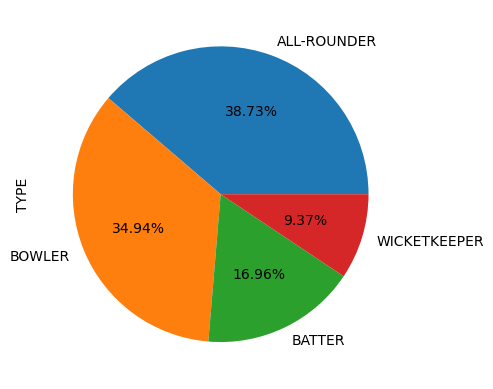

In [82]:
Un_sold_player.TYPE.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

### Unsold Players -- India vs overseas

In [83]:
UnSold_player_Groupby = Un_sold_player.groupby(['TYPE','Indian/overseas'])['TYPE'].count().reset_index(name='Player_count')

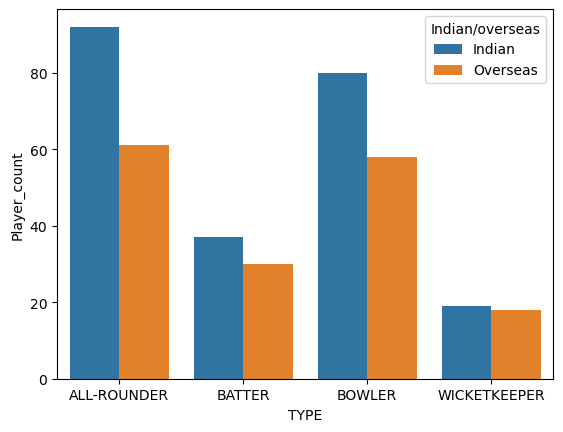

In [84]:
sns.barplot(data=UnSold_player_Groupby, x='TYPE', y='Player_count', hue='Indian/overseas')
plt.show()

### Types of players by each team

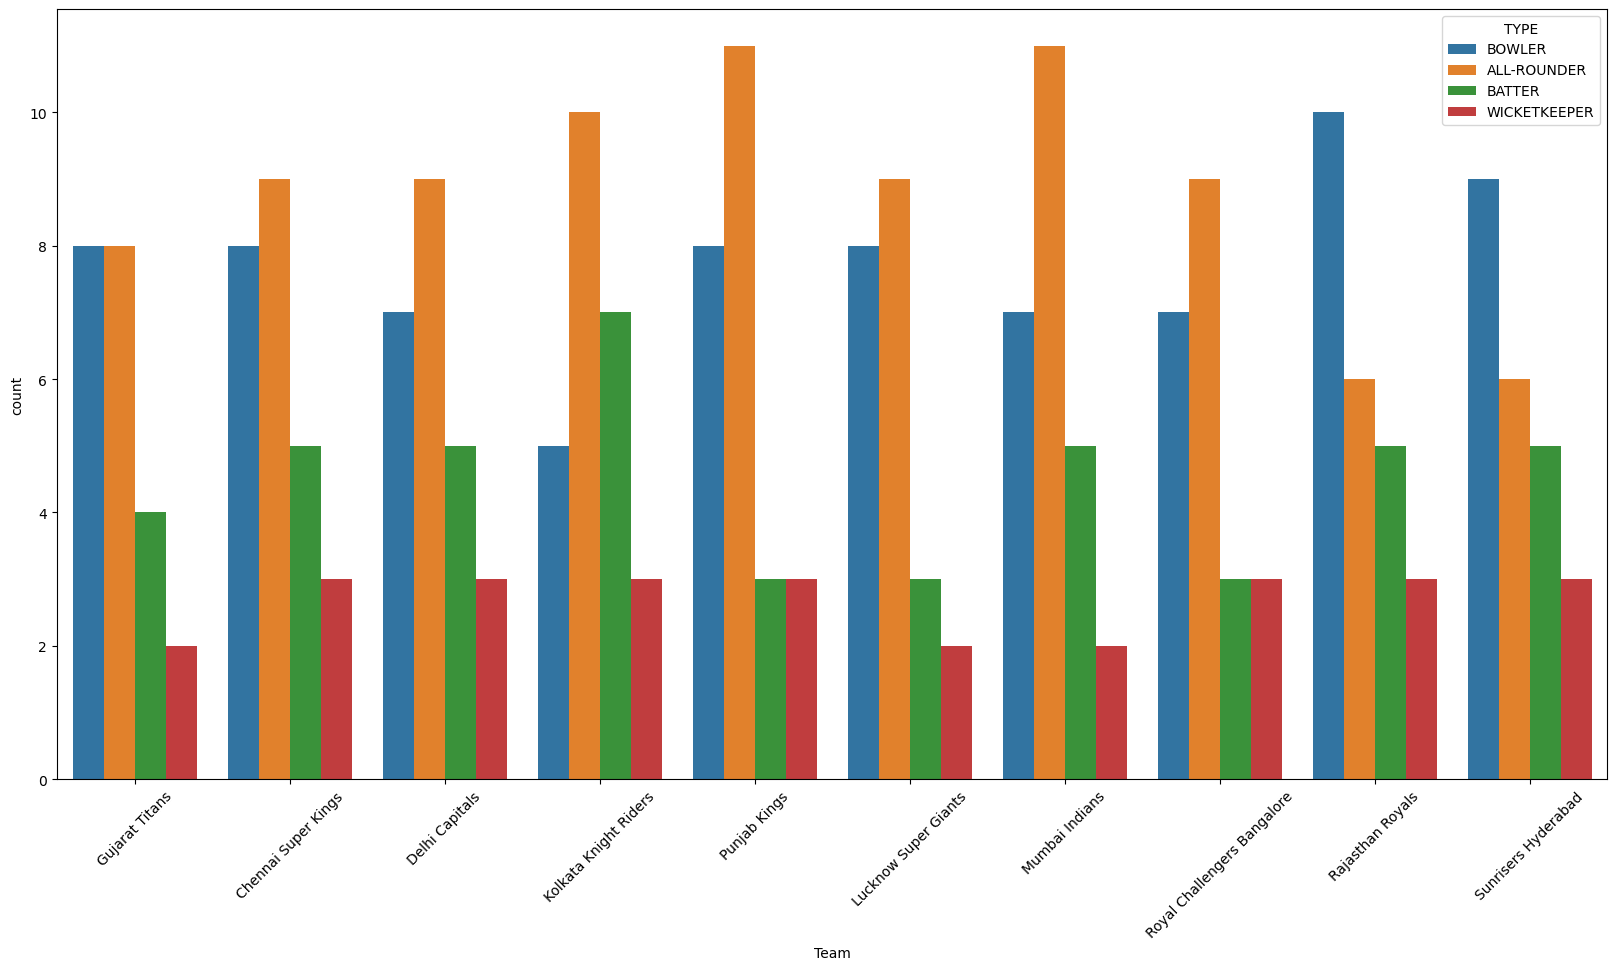

In [85]:
plt.figure(figsize=(20, 10))  
sns.countplot(data=ipl_data, x='Team', hue='TYPE')
plt.xticks(rotation=45)
plt.show()


### Highest amount spent on single player by each team

In [86]:
max_cost_by_team_sorted =  ipl_data[ipl_data['Retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max().sort_values(ascending=False)
max_cost_by_team_sorted

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

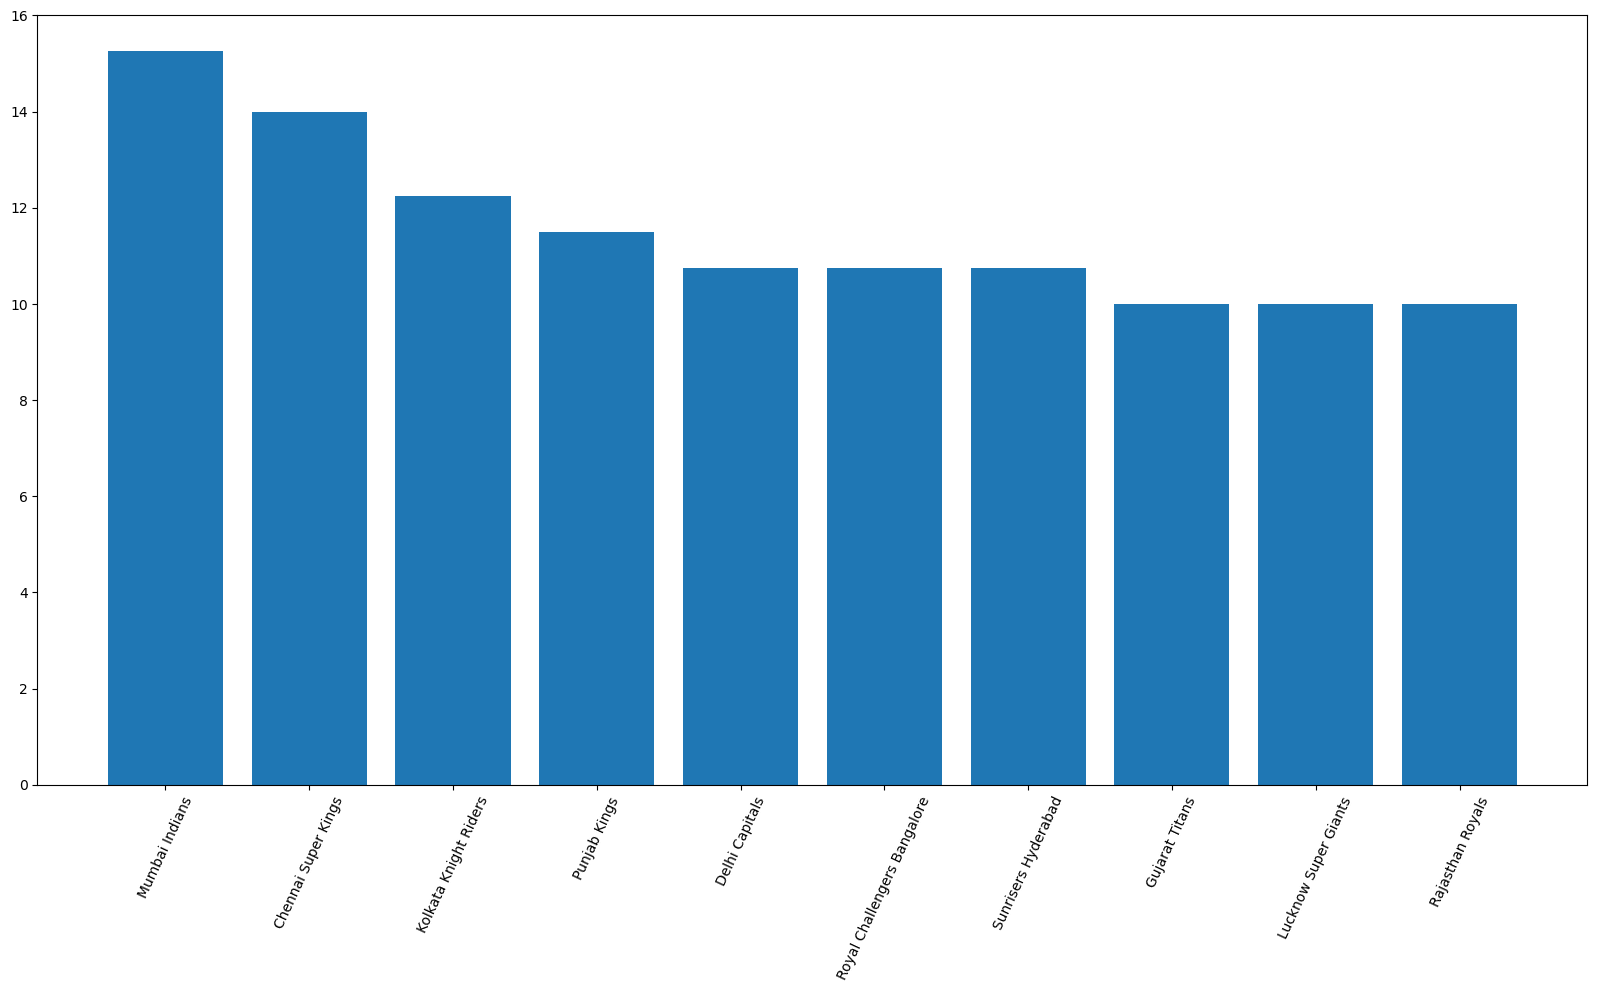

In [87]:
plt.figure(figsize=(20,10))
plt.bar(max_cost_by_team_sorted.index, max_cost_by_team_sorted.values)
plt.xticks(rotation=65)
plt.show()

### Highest amount spent on single Retained player by each team

In [88]:
max_cost_by_team_sorted_Retained =  ipl_data[ipl_data['Retention']=='Retained'].groupby(['Team'])['COST IN ₹ (CR.)'].max().sort_values(ascending=False)
max_cost_by_team_sorted_Retained

Team
Chennai Super Kings            16.0
Delhi Capitals                 16.0
Mumbai Indians                 16.0
Royal Challengers Bangalore    15.0
Rajasthan Royals               14.0
Sunrisers Hyderabad            14.0
Kolkata Knight Riders          12.0
Punjab Kings                   12.0
Name: COST IN ₹ (CR.), dtype: float64

### Players who played in 2021 but not in 2022 ipl

In [89]:
Unsold_2022 = Un_sold_player[(Un_sold_player['2021 Squad'] != 'Not Auctioned') & \
                             (Un_sold_player['Team'] == 'Unsold')][['Player','2021 Squad']]
Unsold_2022

,Player,2021 Squad
0,Suresh Raina,CSK
1,Steve Smith,DC
2,Shakib Al Hasan,KKR
3,Amit Mishra,DC
4,Adil Rashid,PBKS
5,Imran Tahir,CSK
6,Mujeeb Zadran,SRH
7,Adam Zampa,RCB
8,Rajat Patidar,RCB
9,Mohammed Azharuddeen,RCB
